In [2]:
#Read in dataset
from sklearn import datasets
digits = datasets.load_digits()

In [16]:
X = digits.images
y = digits.target

In [17]:
X.shape

(1797, 8, 8)

In [18]:
X = X.reshape((X.shape[0],64))

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(X)

In [28]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.patheffects as PathEffects
def fashion_scatter(x, colors):
    #This function plots nicely
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [23]:
import pandas as pd
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

(<matplotlib.figure.Figure at 0xd050a58>,
 [Text(1.89854,21.3978,'0'),
  Text(6.19851,-13.6224,'1'),
  Text(-10.6332,-6.86631,'2'),
  Text(-19.6494,1.63527,'3'),
  Text(23.3953,-0.520749,'4'),
  Text(-3.18622,0.359012,'5'),
  Text(16.5175,12.4167,'6'),
  Text(-0.0366472,-16.786,'7'),
  Text(-0.791584,-4.99606,'8'),
  Text(-14.5929,10.641,'9')])

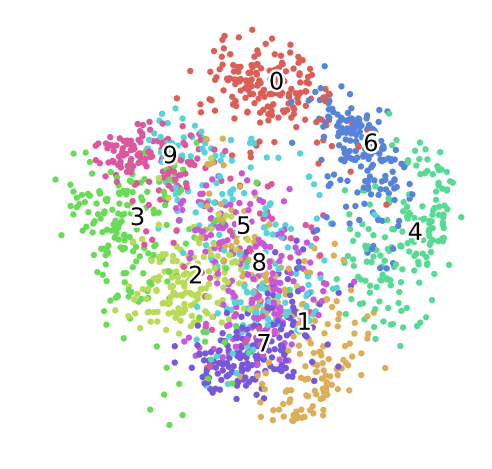

In [29]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

fashion_scatter(top_two_comp.values,y) # Visualizing the PCA output

It doesn't do terrible overall but room for better definitely as the groups are not extremely separated

In [31]:
#Import tSNE
from sklearn.manifold import TSNE
fashion_tsne = TSNE(random_state=0).fit_transform(X)

TSNE takes considerably longer than PCA for large examples

(<matplotlib.figure.Figure at 0xd045978>,
 [Text(71.3609,-3.14294,'0'),
  Text(2.31466,-8.50116,'1'),
  Text(17.43,31.9442,'2'),
  Text(-15.2881,42.1528,'3'),
  Text(10.1777,-50.4758,'4'),
  Text(-48.0448,1.66486,'5'),
  Text(35.6216,-2.92115,'6'),
  Text(-30.2612,-40.5302,'7'),
  Text(-10.3934,9.04711,'8'),
  Text(-34.692,28.2241,'9')])

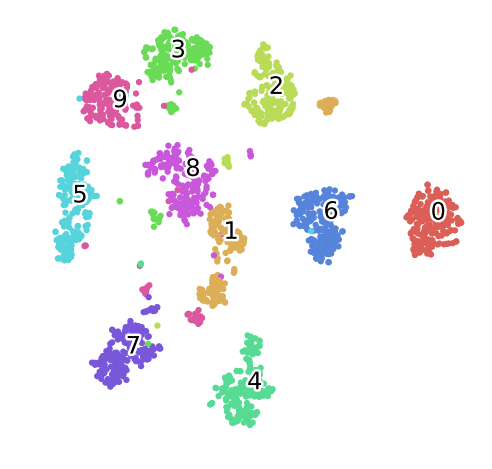

In [33]:
fashion_scatter(fashion_tsne, y)

As you can notice these are already significant improvements from PCA. Now if you chose a clustering algorithm from here ideally it would be able to pick out the correct groupings without even needing the y variable. One big advantage of PCA vs tSNE for this type of work is the ability to capture non linear relationships

From sklearn documentation: It is highly recommended to use another dimensionality reduction method (e.g., PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g., 50) if the number of features is very high. This will suppress some noise and speed up the computation of pairwise distances between samples.

In [34]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(X)

In [36]:
fashion_pca_tsne = TSNE(random_state=0).fit_transform(pca_result_50)

(<matplotlib.figure.Figure at 0xd543390>,
 [Text(58.9397,-5.42414,'0'),
  Text(9.31429,-1.31518,'1'),
  Text(1.76473,42.8331,'2'),
  Text(-28.4262,27.6602,'3'),
  Text(24.4009,-37.7444,'4'),
  Text(-40.7107,-16.2498,'5'),
  Text(35.7348,24.5809,'6'),
  Text(-10.278,-46.2788,'7'),
  Text(-9.5241,3.68511,'8'),
  Text(-45.2429,9.59166,'9')])

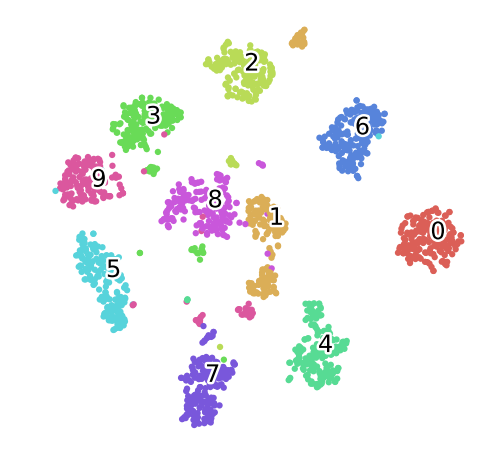

In [37]:
fashion_scatter(fashion_pca_tsne, y)

Tsne has several parameters that can change results quite rapidly. Namely: <br>
**perplexity:** Relates to the idea in kmeans of number of nearest neighbors.  General values are between 5-50. Initial is 30. <br>
**n_iter:** should be at least 250. Default is 1000


Perplexity

(<matplotlib.figure.Figure at 0xce8e128>,
 [Text(-7.15479,41.3853,'0'),
  Text(11.9171,-7.4219,'1'),
  Text(3.50601,83.0941,'2'),
  Text(-71.5545,3.38762,'3'),
  Text(-14.7725,-41.9164,'4'),
  Text(-45.6068,-63.8211,'5'),
  Text(79.2673,-21.1698,'6'),
  Text(-40.951,35.0054,'7'),
  Text(41.4567,-22.8088,'8'),
  Text(41.6226,36.976,'9')])

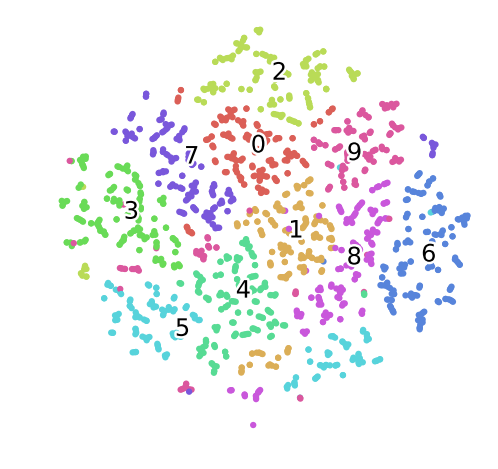

In [40]:
#too low of a perplexity
fashion_pca_tsne = TSNE(random_state=0, perplexity = 2).fit_transform(pca_result_50)
fashion_scatter(fashion_pca_tsne, y)

(<matplotlib.figure.Figure at 0xacb6ac8>,
 [Text(31.7937,-1.10408,'0'),
  Text(-9.99477,-3.40398,'1'),
  Text(-17.3869,17.8153,'2'),
  Text(-0.28361,20.0573,'3'),
  Text(-8.72179,-21.0584,'4'),
  Text(9.76778,1.61295,'5'),
  Text(14.5657,-21.4153,'6'),
  Text(-24.3658,-6.37488,'7'),
  Text(-7.13609,5.50701,'8'),
  Text(7.53704,13.8291,'9')])

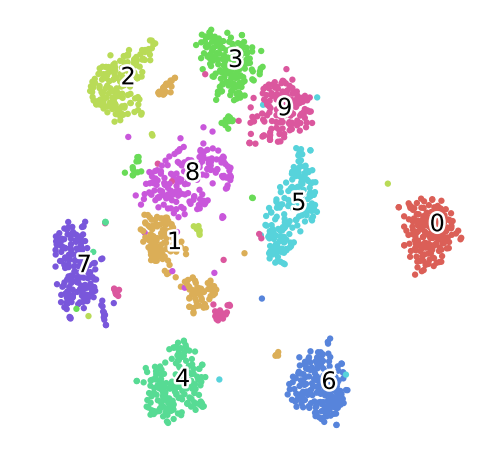

In [41]:
fashion_pca_tsne = TSNE(random_state=0, perplexity = 100).fit_transform(pca_result_50)
fashion_scatter(fashion_pca_tsne, y)

(<matplotlib.figure.Figure at 0xae2b5c0>,
 [Text(6.15718,1.51836,'0'),
  Text(-3.19631,1.49031,'1'),
  Text(-2.17635,-5.90898,'2'),
  Text(1.58905,-4.60647,'3'),
  Text(-1.09371,5.5785,'4'),
  Text(1.39574,0.817746,'5'),
  Text(3.0554,5.13984,'6'),
  Text(-6.83945,-2.51974,'7'),
  Text(-1.2891,-1.38836,'8'),
  Text(3.99974,-2.91821,'9')])

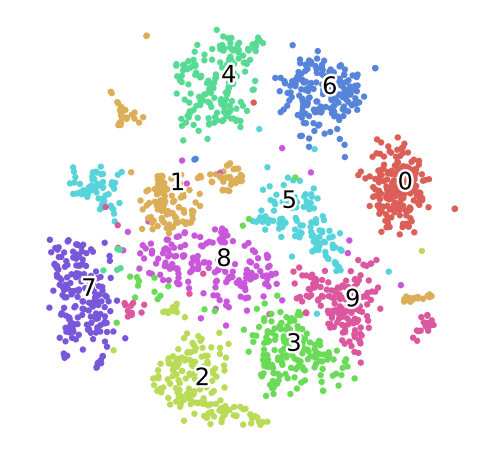

In [42]:
#Here we see we have overshot the perplexity and now our results have downgraded
fashion_pca_tsne = TSNE(random_state=0, perplexity = 500).fit_transform(pca_result_50)
fashion_scatter(fashion_pca_tsne, y)

(<matplotlib.figure.Figure at 0xacb6080>,
 [Text(4.21851,0.0995039,'0'),
  Text(0.0105805,-0.218799,'1'),
  Text(-0.177046,1.88641,'2'),
  Text(-1.51978,0.801696,'3'),
  Text(0.885695,-2.01867,'4'),
  Text(-2.33595,-0.424256,'5'),
  Text(2.04253,1.40226,'6'),
  Text(-0.91084,-1.94418,'7'),
  Text(-0.585752,0.0599845,'8'),
  Text(-1.89311,0.573136,'9')])

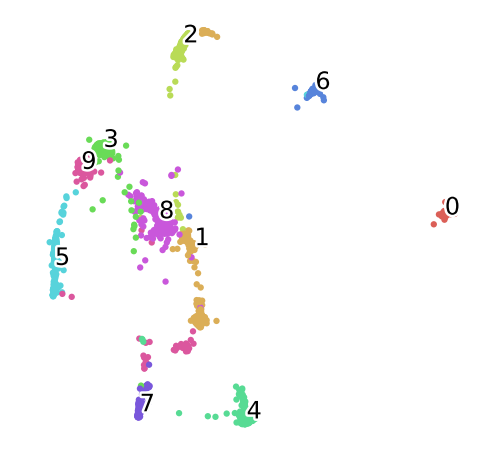

In [44]:
#not enough iterations have happened
fashion_pca_tsne = TSNE(random_state=0, n_iter = 250).fit_transform(pca_result_50)
fashion_scatter(fashion_pca_tsne, y)

(<matplotlib.figure.Figure at 0xfb20518>,
 [Text(39.826,-4.01582,'0'),
  Text(8.10432,-1.32823,'1'),
  Text(1.83807,34.9223,'2'),
  Text(-20.2862,22.3518,'3'),
  Text(18.2,-30.7914,'4'),
  Text(-31.2294,-12.8344,'5'),
  Text(26.3382,20.1748,'6'),
  Text(-8.84437,-34.4969,'7'),
  Text(-7.28191,2.63286,'8'),
  Text(-34.112,8.16736,'9')])

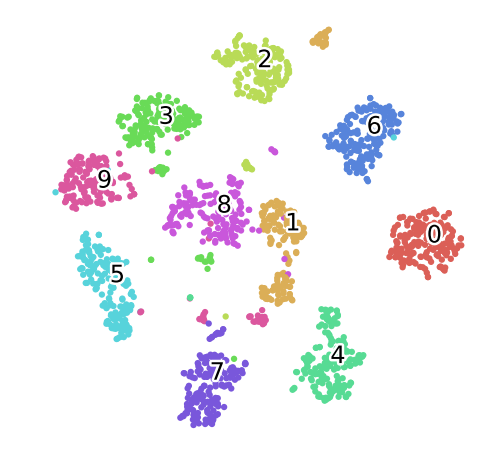

In [45]:
fashion_pca_tsne = TSNE(random_state=0, n_iter = 500).fit_transform(pca_result_50)
fashion_scatter(fashion_pca_tsne, y)

(<matplotlib.figure.Figure at 0xfcd4048>,
 [Text(76.5516,-7.17221,'0'),
  Text(10.1439,-1.8292,'1'),
  Text(2.17868,50.0013,'2'),
  Text(-35.5616,32.6357,'3'),
  Text(30.012,-43.4048,'4'),
  Text(-47.3371,-19.9879,'5'),
  Text(44.9942,27.212,'6'),
  Text(-11.2124,-55.8964,'7'),
  Text(-11.4688,4.88824,'8'),
  Text(-53.2921,10.4098,'9')])

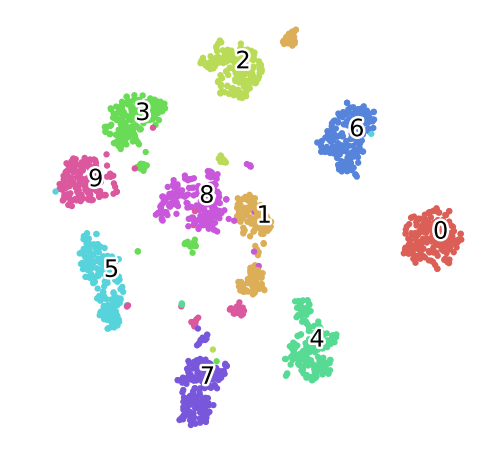

In [46]:
fashion_pca_tsne = TSNE(random_state=0, n_iter = 2000).fit_transform(pca_result_50)
fashion_scatter(fashion_pca_tsne, y)